<a href="https://colab.research.google.com/github/boomboom-98/AIO-Main-course/blob/Develop/%5BSolution%5D_Problem_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **0. Tải bộ dữ liệu**
**Lưu ý:** Nếu không thể tải bằng gdown do bị giới hạn số lượt tải, các bạn hãy tải thủ công và đưa lên drive của mình, sau đó copy từ drive vào colab.
```python
from google.colab import drive

drive.mount('/content/drive')
!cp /path/to/dataset/on/your/drive .
```

In [1]:
# Dataset B: https://drive.google.com/file/d/1fS6pGYj5FMZa8AsBHJ85jaiBJqWA4dqg/view?usp=sharing
!gdown --id 1fS6pGYj5FMZa8AsBHJ85jaiBJqWA4dqg

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1fS6pGYj5FMZa8AsBHJ85jaiBJqWA4dqg
To: /content/timeseries_daily-minimum-temperatures.csv
100% 55.9k/55.9k [00:00<00:00, 54.0MB/s]


## **1. Import thư viện và load dataset**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
DATASET_PATH = './timeseries_daily-minimum-temperatures.csv'

# Read data from .csv file
ts_df = pd.read_csv(DATASET_PATH)

print(ts_df.shape)
print(ts_df.dtypes)
ts_df.head(3)

(3650, 2)
Date                          object
Daily minimum temperatures    object
dtype: object


,Date,Daily minimum temperatures
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8


In [10]:
ts_df['Date'] = pd.to_datetime(ts_df['Date']) #B1: Kiểu dữ liệu hiện tại là string cần ép kiểu cột 'date' thành kiểu dữ liệu daytime.
ts_df = ts_df.set_index('Date')               # B2: Lấy cột 'date' làm cột giá trị index luôn,
ts_df.head(3)                                 # Hiện 3 hàng đầu tiên

,Daily minimum temperatures
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8


In [12]:
ts_df = pd.read_csv(DATASET_PATH, index_col=0, parse_dates=True)
# Khi chuyển cột 'Date' sang dạng daytime. Ta có thể dùng hàm để tính năm, tháng, ngày thứ mấy.
ts_df['Year'] = ts_df.index.year  # Tính năm
ts_df['Month'] = ts_df.index.month  # Tính tháng
ts_df['Weekday Name'] = ts_df.index.day_name()   # Tính ngày

ts_df.sample(5, random_state=0)

,Daily minimum temperatures,Year,Month,Weekday Name
Date,,,,
1990-08-20,9.7,1990,8,Monday
1982-07-24,6.6,1982,7,Saturday
1983-09-19,12,1983,9,Monday
1986-09-28,6.9,1986,9,Sunday
1988-01-12,18.3,1988,1,Tuesday


In [13]:
ts_df.dtypes

,0
Daily minimum temperatures,object
Year,int32
Month,int32
Weekday Name,object


In [14]:
ts_df['Daily minimum temperatures'] = pd.to_numeric(
    ts_df['Daily minimum temperatures'], errors='coerce')
ts_df.dtypes

,0
Daily minimum temperatures,float64
Year,int32
Month,int32
Weekday Name,object


## **2. Time-based indexing**

In [15]:
ts_df.loc['1990-01-01':'1991-01-01']

,Daily minimum temperatures,Year,Month,Weekday Name
Date,,,,
1990-01-01,14.8,1990,1,Monday
1990-01-02,13.3,1990,1,Tuesday
1990-01-03,15.6,1990,1,Wednesday
1990-01-04,14.5,1990,1,Thursday
1990-01-05,14.3,1990,1,Friday
...,...,...,...,...
1990-12-27,14.0,1990,12,Thursday
1990-12-28,13.6,1990,12,Friday
1990-12-29,13.5,1990,12,Saturday


In [16]:
ts_df.loc['1990-01']

,Daily minimum temperatures,Year,Month,Weekday Name
Date,,,,
1990-01-01,14.8,1990,1,Monday
1990-01-02,13.3,1990,1,Tuesday
1990-01-03,15.6,1990,1,Wednesday
1990-01-04,14.5,1990,1,Thursday
1990-01-05,14.3,1990,1,Friday
1990-01-06,15.3,1990,1,Saturday
1990-01-07,16.4,1990,1,Sunday
1990-01-08,14.8,1990,1,Monday
1990-01-09,17.4,1990,1,Tuesday


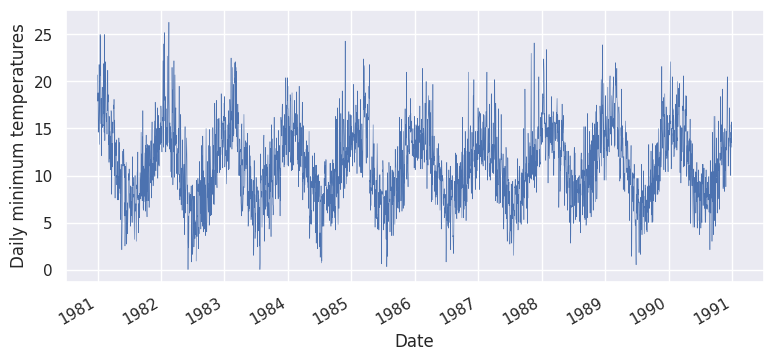

In [19]:
sns.set(rc={'figure.figsize':(9, 4)})
col_to_plot = 'Daily minimum temperatures'
ts_df[col_to_plot].plot(linewidth=0.4) # đê mặc định thì biểu đồ sẽ nối các điểm với nhau. Thành ra chúng ra được cái hình kẻ kẻ như thế này.
plt.ylabel(col_to_plot)
plt.show()

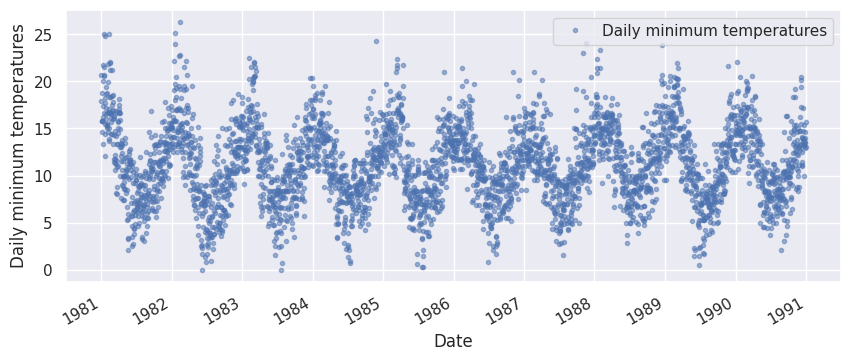

In [22]:
cols_plot = ['Daily minimum temperatures']
# Customize đồ thị
ts_df[cols_plot].plot(
    marker='.', # đổi đường kẻ sang hình tròn
    alpha=0.5,
    linestyle='None',
    figsize=(10, 4),
    subplots=True
)
plt.ylabel('Daily minimum temperatures')
plt.show()

## **4. Seasonality**



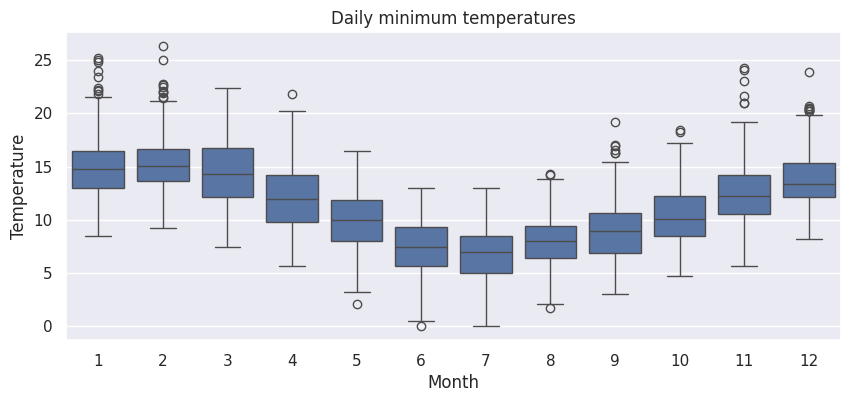

In [26]:
COL_NAME = 'Daily minimum temperatures'
plt.figure(figsize=(10, 4))
sns.boxplot(data=ts_df, x='Month', y=COL_NAME) # Vẽ biêt đồ dựa vào data từng tháng.
plt.ylabel('Temperature')
plt.title(COL_NAME)
plt.show()

## **5. Frequencies**

In [27]:
pd.date_range('1998-03-10', '1998-03-15', freq='D')

DatetimeIndex(['1998-03-10', '1998-03-11', '1998-03-12', '1998-03-13',
               '1998-03-14', '1998-03-15'],
              dtype='datetime64[ns]', freq='D')

In [28]:
pd.date_range('2004-09-20', periods=8, freq='H')

DatetimeIndex(['2004-09-20 00:00:00', '2004-09-20 01:00:00',
               '2004-09-20 02:00:00', '2004-09-20 03:00:00',
               '2004-09-20 04:00:00', '2004-09-20 05:00:00',
               '2004-09-20 06:00:00', '2004-09-20 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [29]:
# To select an arbitrary sequence of date/time values from a pandas time series,
# we need to use a DatetimeIndex, rather than simply a list of date/time strings
times_sample = pd.to_datetime(['1981-01-01', '1981-01-04', '1981-01-08'])
# Select the specified dates and just the Consumption column
consum_sample = ts_df.loc[times_sample, ['Daily minimum temperatures']].copy()
consum_sample

,Daily minimum temperatures
1981-01-01,20.7
1981-01-04,14.6
1981-01-08,17.4


In [30]:
# Convert the data to daily frequency, without filling any missings
consum_freq = consum_sample.asfreq('D')
# Create a column with missings forward filled
consum_freq['Daily minimum temperatures - Forward Fill'] = consum_sample.asfreq('D', method='ffill')
consum_freq

,Daily minimum temperatures,Daily minimum temperatures - Forward Fill
1981-01-01,20.7,20.7
1981-01-02,NaN,20.7
1981-01-03,NaN,20.7
1981-01-04,14.6,14.6
1981-01-05,NaN,14.6
1981-01-06,NaN,14.6
1981-01-07,NaN,14.6
1981-01-08,17.4,17.4


## **6. Resampling**

In [33]:
data_columns = ['Daily minimum temperatures']
ts_weekly_mean = ts_df[data_columns].resample('W').mean()
ts_weekly_mean.head(3)

,Daily minimum temperatures
Date,
1981-01-04,18.000000
1981-01-11,17.542857
1981-01-18,20.371429


In [34]:
print(ts_df.shape[0])
print(ts_weekly_mean.shape[0])

3650
523


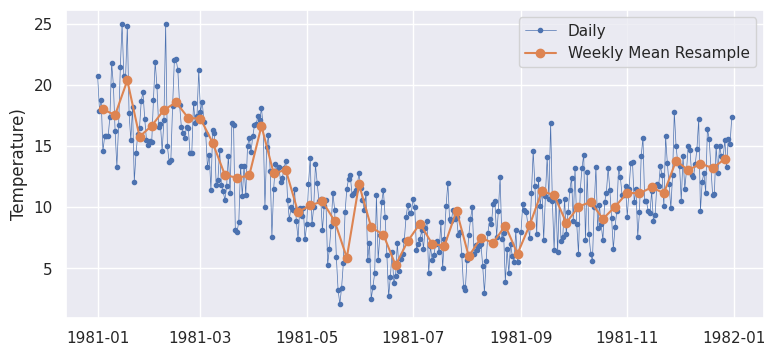

In [35]:
# Start and end of the date range to extract
start, end = '1981-01', '1981-12'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(ts_df.loc[start:end, 'Daily minimum temperatures'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(ts_weekly_mean.loc[start:end, 'Daily minimum temperatures'],
marker='o', linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Temperature)')
ax.legend()
plt.show()

In [36]:
# Compute the annual sums, setting the value to NaN for any year which has
# fewer than 360 days of data
ts_annual_df = ts_df[data_columns].resample('A').sum(min_count=360)
# The default index of the resampled DataFrame is the last day of each year
# to the year component
ts_annual_df = ts_annual_df.set_index(ts_annual_df.index.year)
ts_annual_df.index.name = 'Year'
# Compute the ratio of Wind+Solar to Consumption
ts_annual_df.tail(3)

,Daily minimum temperatures
Year,
1988,4369.8
1989,4110.6
1990,4259.4


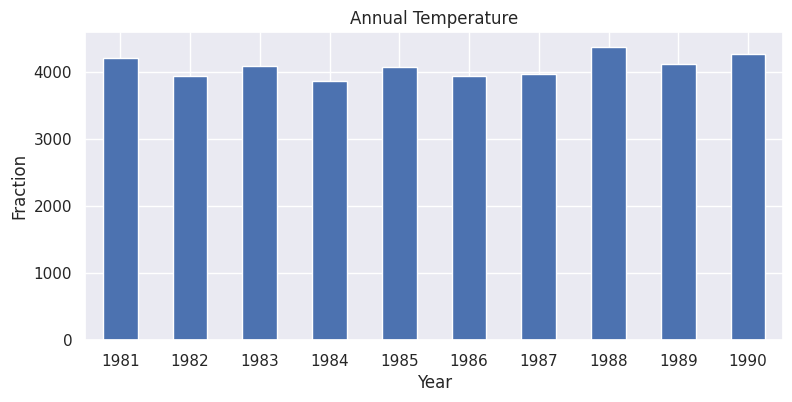

In [ ]:
# Plot from 1981 onwards, because there is no solar production data in earlier years
ax = ts_annual_df.loc[1981:, 'Daily minimum temperatures'].plot.bar(color='C0')
ax.set_ylabel('Fraction')
ax.set_title('Annual Temperature')
plt.xticks(rotation=0)
plt.show()